# Accessibility to Public Services: Ecuador Case

In [29]:
import geopandas as gpd #Para archivos .shp 
import matplotlib.pyplot as plt #Para gráficar 
#Se define el tamaño de salidad de las gráficas

import numpy as np 
import pandas as pd

from shapely import wkt
import geopy.distance
from math import radians, cos, sin, asin, sqrt

from pandas.core.frame import DataFrame
from functools import reduce
import pyproj as pp
from pyproj import Proj


from pylab import rcParams 
rcParams['figure.figsize'] = 12, 12

## Personas pobres lejos de los centros de anteción

In [49]:
#Database from MIES

# BDH and others pensions 
df_1 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/BENEFICIARIOS_BONOS_PENSIONES_JUL2022.xls", sheet_name= "PARTE 1 JULIO2022",dtype={'dpa_provin': str})
df_2 = pd.read_excel("https://info.inclusion.gob.ec/images/usuarios_externos/2022/BENEFICIARIOS_BONOS_PENSIONES_JUL2022.xls", sheet_name= "PARTE 2 JULIO2022")
df_MIES = pd.concat([df_1, df_2], ignore_index=True)


df_ben = df_MIES.groupby(['dpa_despro','beneficio'])['beneficio'].count().reset_index(name='Total_beneficiarios')
df_ben




,dpa_despro,beneficio,Total_beneficiarios
0,AZUAY,BONO 1000 DÍAS,352
1,AZUAY,BONO DE DESARROLLO HUMANO,22649
2,AZUAY,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,6423
3,AZUAY,BONO JOAQUIN GALLEGOS LARA,1077
4,AZUAY,PENSION MIS MEJORES AÑOS,11233
...,...,...,...
162,ZONA EN ESTUDIO,BONO 1000 DÍAS,1
163,ZONA EN ESTUDIO,BONO DE DESARROLLO HUMANO,45
164,ZONA EN ESTUDIO,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,13
165,ZONA EN ESTUDIO,PENSION MIS MEJORES AÑOS,27


<AxesSubplot:>

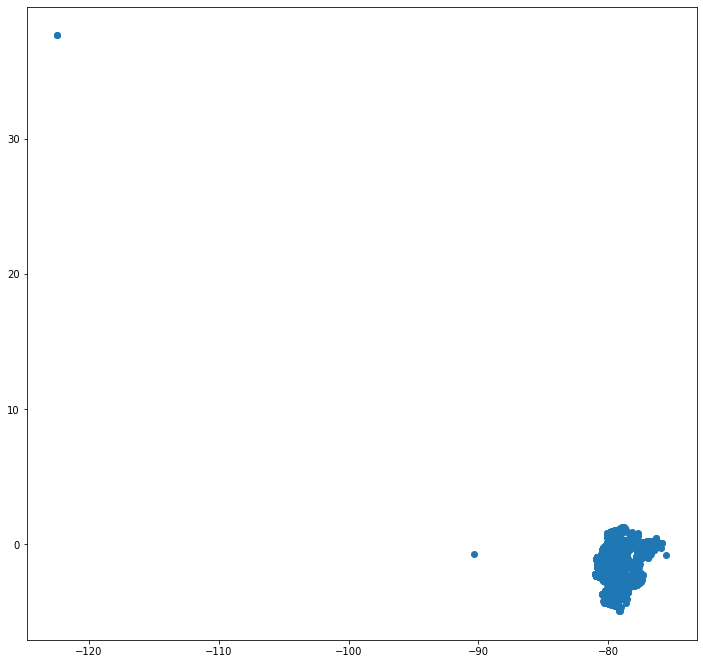

In [31]:
# Convertir la base RS2018 en formato espacial

df_MIES_gdf= gpd.GeoDataFrame(df_MIES, geometry= gpd.points_from_xy(df_MIES['lon'],df_MIES['lat']))
df_MIES_gdf['geometry'] = df_MIES_gdf['geometry'].astype(str).apply(wkt.loads)
gdf_hog = gpd.GeoDataFrame(df_MIES_gdf)

gdf_hog = gdf_hog.set_crs("EPSG:4326")
gdf_hog.plot()

Debido a que los puntos de MIES tiene puntos geográficos equivocados (puntos que se encuentran por afuera del Ecuador), se realiza los siguientes pasos:

1. Se carga el shape de las provincias de Ecuador y se convierte en el formato 4326 (mismo formato geográfico de la base del MIES)

In [32]:
df_prov= gpd.read_file("../data/Ecuador_provincias/ecuador.shp") #Se lee la base de datos .Shp
df_prov = df_prov.to_crs("EPSG:4326")

Error in sys.excepthook:
Traceback (most recent call last):
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py", line 1934, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'UnicodeDecodeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\interactiveshell.py", line 1936, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPython\core\ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "c:\Users\marco\anaconda3\envs\geo_env\lib\site-packages\IPyt

2. Intercepción entre los beneficiarios del MIES y shape de las provincias de Ecuador.


In [41]:
df_final = gpd.sjoin(gdf_hog,df_prov,how='left')
df_final.head(2)

,zp,ud_mies,dpa_provin,dpa_despro,dpa_cant,dpa_descan,dpa_parroq,dpa_despar,beneficio,edad,...,OBJECTID,DPA_PROVIN,DPA_DESPRO,DPA_VALOR,DPA_ANIO,REI_CODIGO,REN_CODIGO,PEE_CODIGO,Shape_Leng,Shape_Area
0,Zona Planificación 6,UNIDAD DESCONCENTRADA ZONAL 6,1,AZUAY,108,SANTA ISABEL,10851,ABDON CALDERON (LA UNION),PENSION MIS MEJORES AÑOS,73.0,...,1.0,01,AZUAY,0.0,2010,05,01,593,679651.580798,8.325642e+09
1,Zona Planificación 6,UNIDAD DESCONCENTRADA ZONAL 6,1,AZUAY,101,CUENCA,10150,CUENCA,PENSION PARA ADULTOS MAYORES,81.0,...,1.0,01,AZUAY,0.0,2010,05,01,593,679651.580798,8.325642e+09


3. Se elimina los puntos que están afuera de Ecuador

<AxesSubplot:>

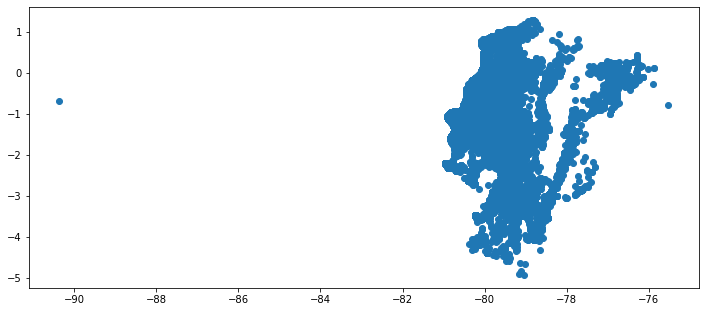

In [42]:
df_final.dropna(subset=['DPA_DESPRO'], inplace = True )
df_final.plot()

In [43]:
df_final = df_final[['ud_mies','DPA_PROVIN','DPA_DESPRO','beneficio','edad','geometry']]

,DPA_DESPRO,beneficio,Total_beneficiarios
0,AZUAY,BONO 1000 DÍAS,350
1,AZUAY,BONO DE DESARROLLO HUMANO,22462
2,AZUAY,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,6375
3,AZUAY,BONO JOAQUIN GALLEGOS LARA,1065
4,AZUAY,PENSION MIS MEJORES AÑOS,11157
...,...,...,...
163,ZONA NO DELIMITADA,BONO DE DESARROLLO HUMANO,328
164,ZONA NO DELIMITADA,BONO DE DESARROLLO HUMANO CON COMPONENTE VARIABLE,101
165,ZONA NO DELIMITADA,BONO JOAQUIN GALLEGOS LARA,11
166,ZONA NO DELIMITADA,PENSION MIS MEJORES AÑOS,38


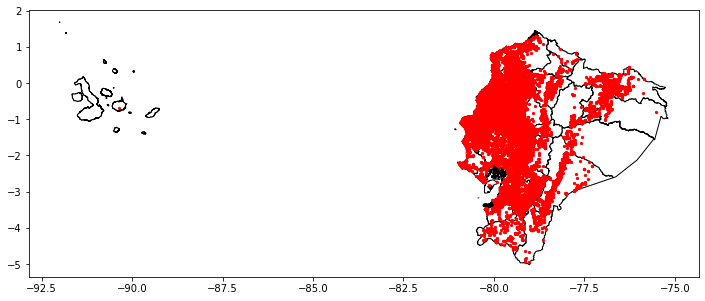

In [45]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

df_prov.plot(ax=ax, color='white', edgecolor='black')
df_final.plot(ax=ax, marker='o', color='red', markersize=5)

plt.show()